# Problem

Problem statement: To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.


Daimler is interested to deal the curse of dimensionality and reduce the time that cars spend on the test bench.Data scientist will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.


Note: To maintain data integrity the company's data is in coded format without real name of attributes

## Importing required librareis

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
from statsmodels.graphics.gofplots import qqplot

In [6]:
from scipy.stats import norm
from scipy import stats

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [8]:
import statsmodels.api as sm

In [9]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [10]:
from xgboost import  XGBRegressor

In [11]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [12]:
import tensorflow

# Preprocessing

In [13]:
data = pd.read_csv('train.csv/train.csv') # reading data
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [14]:
data.shape # rows and columns in the data

(4209, 378)

In [15]:
data.describe() # five point summary of numerical attributes

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0000

In [16]:
checking_null=data.isnull().sum()
for id, val in zip(checking_null.index, checking_null.values):
    print(id, val) # printing columns with count of null values

ID 0
y 0
X0 0
X1 0
X2 0
X3 0
X4 0
X5 0
X6 0
X8 0
X10 0
X11 0
X12 0
X13 0
X14 0
X15 0
X16 0
X17 0
X18 0
X19 0
X20 0
X21 0
X22 0
X23 0
X24 0
X26 0
X27 0
X28 0
X29 0
X30 0
X31 0
X32 0
X33 0
X34 0
X35 0
X36 0
X37 0
X38 0
X39 0
X40 0
X41 0
X42 0
X43 0
X44 0
X45 0
X46 0
X47 0
X48 0
X49 0
X50 0
X51 0
X52 0
X53 0
X54 0
X55 0
X56 0
X57 0
X58 0
X59 0
X60 0
X61 0
X62 0
X63 0
X64 0
X65 0
X66 0
X67 0
X68 0
X69 0
X70 0
X71 0
X73 0
X74 0
X75 0
X76 0
X77 0
X78 0
X79 0
X80 0
X81 0
X82 0
X83 0
X84 0
X85 0
X86 0
X87 0
X88 0
X89 0
X90 0
X91 0
X92 0
X93 0
X94 0
X95 0
X96 0
X97 0
X98 0
X99 0
X100 0
X101 0
X102 0
X103 0
X104 0
X105 0
X106 0
X107 0
X108 0
X109 0
X110 0
X111 0
X112 0
X113 0
X114 0
X115 0
X116 0
X117 0
X118 0
X119 0
X120 0
X122 0
X123 0
X124 0
X125 0
X126 0
X127 0
X128 0
X129 0
X130 0
X131 0
X132 0
X133 0
X134 0
X135 0
X136 0
X137 0
X138 0
X139 0
X140 0
X141 0
X142 0
X143 0
X144 0
X145 0
X146 0
X147 0
X148 0
X150 0
X151 0
X152 0
X153 0
X154 0
X155 0
X156 0
X157 0
X158 0
X159 0
X160 0
X161 0
X16

There is no null values in the data set

In [17]:
# checking duplicated values
print('Count of duplicated values',data.duplicated().sum())

Count of duplicated values 0


Interpretation:
    There is no duplicated values in the data set

In [18]:
data.info()# 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [19]:
for id, val in zip(data.dtypes.index, data.dtypes.values): # checking data types of each variable
    print(id, val)

ID int64
y float64
X0 object
X1 object
X2 object
X3 object
X4 object
X5 object
X6 object
X8 object
X10 int64
X11 int64
X12 int64
X13 int64
X14 int64
X15 int64
X16 int64
X17 int64
X18 int64
X19 int64
X20 int64
X21 int64
X22 int64
X23 int64
X24 int64
X26 int64
X27 int64
X28 int64
X29 int64
X30 int64
X31 int64
X32 int64
X33 int64
X34 int64
X35 int64
X36 int64
X37 int64
X38 int64
X39 int64
X40 int64
X41 int64
X42 int64
X43 int64
X44 int64
X45 int64
X46 int64
X47 int64
X48 int64
X49 int64
X50 int64
X51 int64
X52 int64
X53 int64
X54 int64
X55 int64
X56 int64
X57 int64
X58 int64
X59 int64
X60 int64
X61 int64
X62 int64
X63 int64
X64 int64
X65 int64
X66 int64
X67 int64
X68 int64
X69 int64
X70 int64
X71 int64
X73 int64
X74 int64
X75 int64
X76 int64
X77 int64
X78 int64
X79 int64
X80 int64
X81 int64
X82 int64
X83 int64
X84 int64
X85 int64
X86 int64
X87 int64
X88 int64
X89 int64
X90 int64
X91 int64
X92 int64
X93 int64
X94 int64
X95 int64
X96 int64
X97 int64
X98 int64
X99 int64
X100 int64
X101 int64

only first 8 columns are categorical rest are numerical in nature

In [20]:
data.select_dtypes(include = object).describe()

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


Categorical columns like X0, X1, X2, X5 contain more than 20 categories, it means label encoding would be feasible for categorical variable instead of one hot encoding

In [21]:
for col in data.columns: # checking subcategories in each attributes 
    print('for attribute {}, number of categories {}'.format(col, data[col].nunique()))

for attribute ID, number of categories 4209
for attribute y, number of categories 2545
for attribute X0, number of categories 47
for attribute X1, number of categories 27
for attribute X2, number of categories 44
for attribute X3, number of categories 7
for attribute X4, number of categories 4
for attribute X5, number of categories 29
for attribute X6, number of categories 12
for attribute X8, number of categories 25
for attribute X10, number of categories 2
for attribute X11, number of categories 1
for attribute X12, number of categories 2
for attribute X13, number of categories 2
for attribute X14, number of categories 2
for attribute X15, number of categories 2
for attribute X16, number of categories 2
for attribute X17, number of categories 2
for attribute X18, number of categories 2
for attribute X19, number of categories 2
for attribute X20, number of categories 2
for attribute X21, number of categories 2
for attribute X22, number of categories 2
for attribute X23, number of cate

All numerical columns have 2 categories that is zero and 1

### Program to remove variable whose standard deviation is zero

In [22]:
list_columns_zero_deviation = [] # to make list of columns wth zero standard deviation
print('column with zero standard deviation ')
for col in data.select_dtypes(exclude = object).columns:
    if data[col].std() == 0:
        list_columns_zero_deviation.append(col)
        print(col)

column with zero standard deviation 
X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X347


### Removing irrelevant attributes

In [23]:
data_copy = data.copy()
data = data.drop(columns = list_columns_zero_deviation, axis =1) # removing attributes with zero standard deviation
data = data.drop(columns = 'ID') # removing id as it is not relevant for columns

In [24]:
data.shape

(4209, 365)

In [25]:
### Dealing with columns 

In [26]:
for col in data.drop(columns = 'y', axis =1).select_dtypes(exclude= object).columns:
    for val in data[col]:
        if val not in [0,1]:
            print(val)  # since no output is coming , this code confirms that only 0 and 1 are the numerical number present

The code shows that no values are there in the numerical columns other than 0 and 1

### Encoding categorical columns with label encoder

In [27]:
data.select_dtypes(include = object).columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [28]:
# encoding catgorical columns 
label_encoder = LabelEncoder()
for col in data.select_dtypes(include = object).columns:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X295,X296,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0

### Splitting the data into train and test

In [29]:
# splitting
y  = data['y']
X = data.drop(columns = 'y',axis =1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
print("Shape of data after splitting")
print( 'X train ',X_train.shape)
print('X test',X_test.shape)
print('y train',y_train.shape)
print('y test', y_test.shape)

Shape of data after splitting
X train  (2820, 364)
X test (1389, 364)
y train (2820,)
y test (1389,)


# Visualization

### Analyzing target variable

In [30]:
y.describe() # five point summary of target variable

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

The mean is 100.66 and median is 99.15 approximately data can be normal, since 

In [31]:
print('skewness in target variable', y.skew())
print('kurtosis in target variable', y.kurt())

skewness in target variable 1.206525852242492
kurtosis in target variable 7.910712683715831


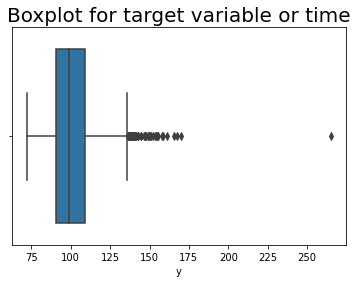

In [32]:
sns.boxplot(x =y)
plt.title('Boxplot for target variable or time', fontdict= {'size':20})
plt.show()

The boxplot shows the presence of outliers which means that some test for car will take much time 

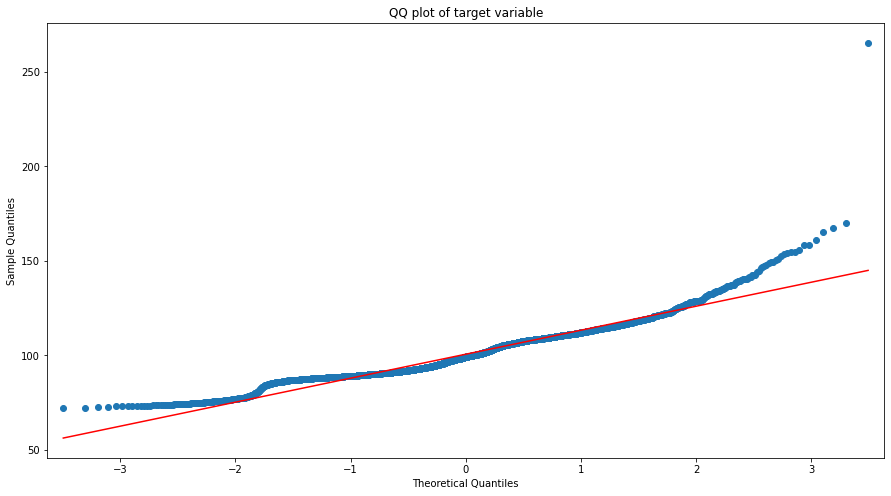

In [33]:
plt.rcParams['figure.figsize'] = 15,8
qqplot(y, line ='s')
plt.title("QQ plot of target variable")
plt.show();

C:\Users\rishw\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rishw\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


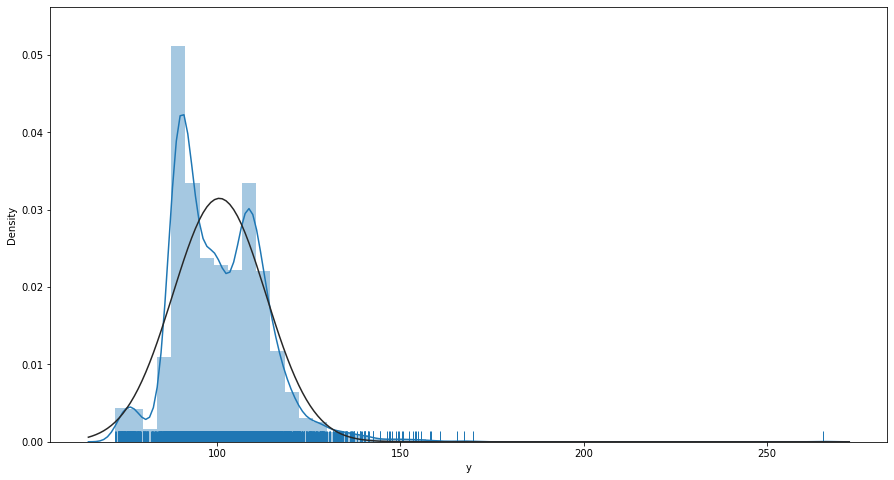

In [34]:
sns.distplot(a = y, rug= True, fit= norm )
plt.show()

In [35]:
stats.shapiro(y)# shapiro test

ShapiroResult(statistic=0.93858402967453, pvalue=1.2467101604672783e-38)

The normality test hypothesis is mentioned below:

H0: Data is normally distributed

H1: Data is not normally distributed

p value is almost zero which is less than level of significance (0.5), fail to reject null hypothesis , it concludes data is not normally distributed on the basis of shapiro test, however the distribution appear normal in qq plot and distplot. According to visual interpretation we are good to go for further analysis and modeling

### Categorical columns plot

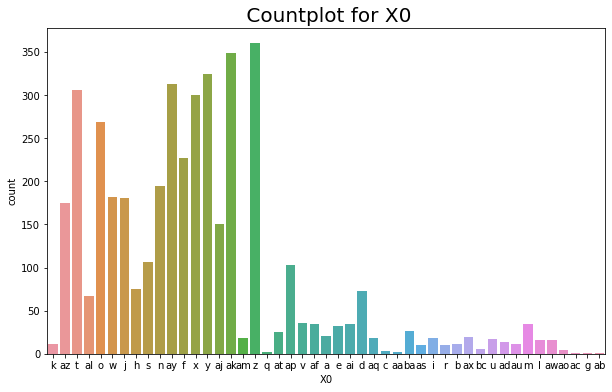

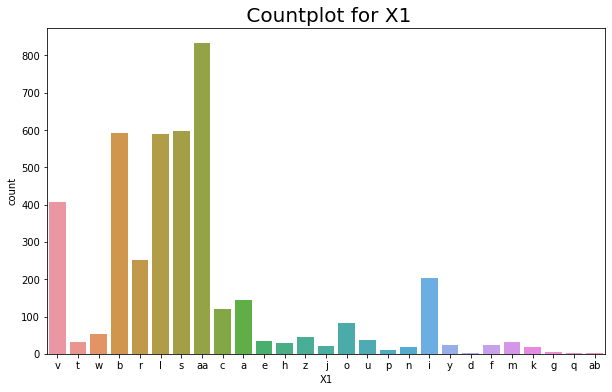

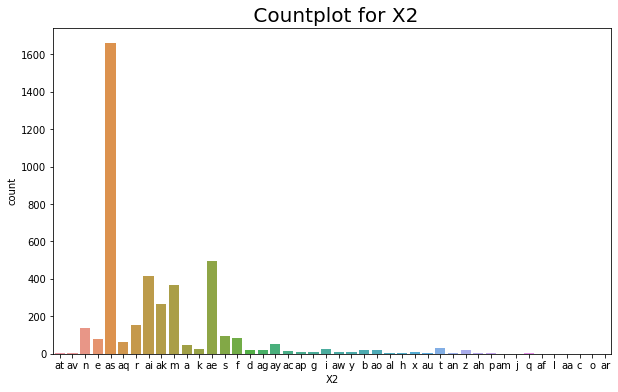

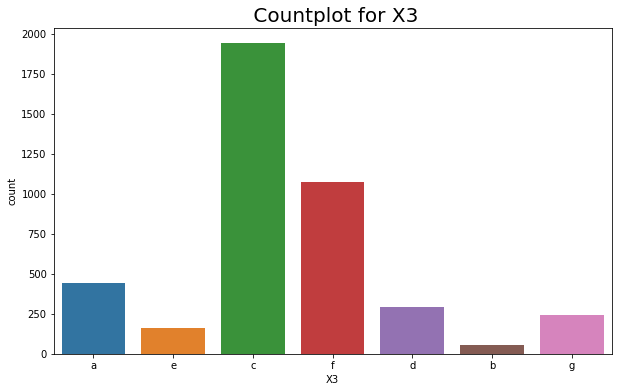

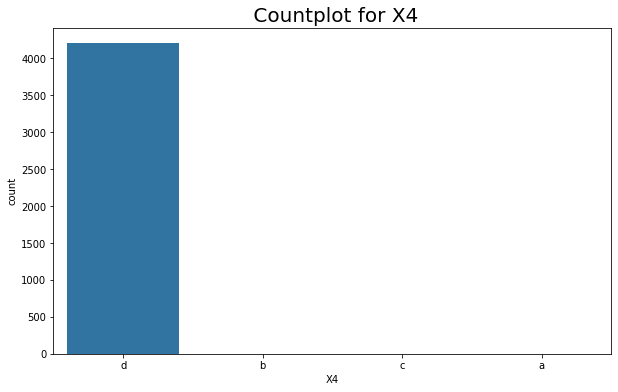

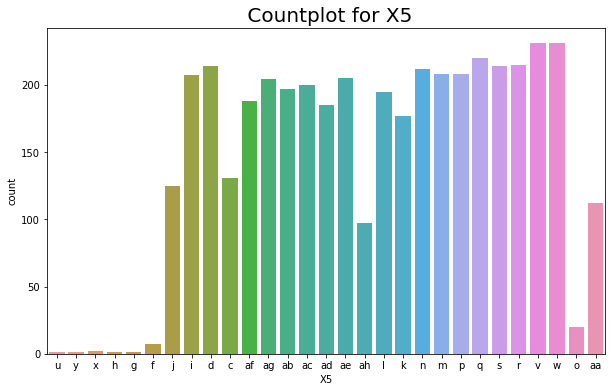

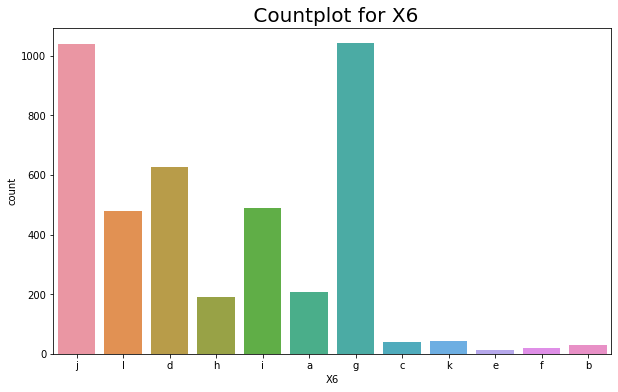

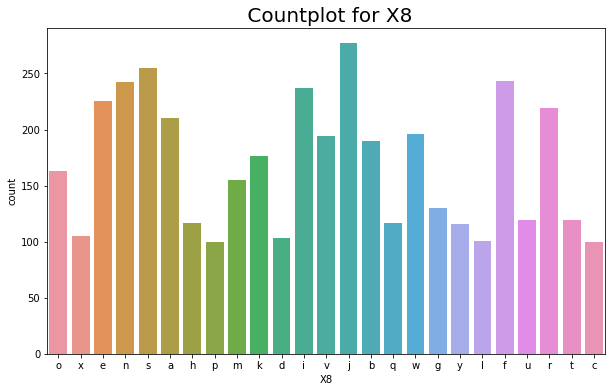

In [36]:
plt.rcParams['figure.figsize'] = 10,6
for col in data_copy.select_dtypes(include= object).columns: # countplot of categorical columns 
    sns.countplot(x = data_copy[col])
    plt.title(' Countplot for {}'.format(col), fontdict= {'size' :20})
    plt.show()

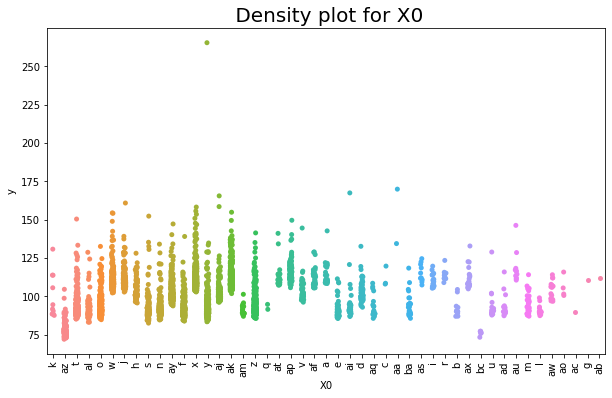

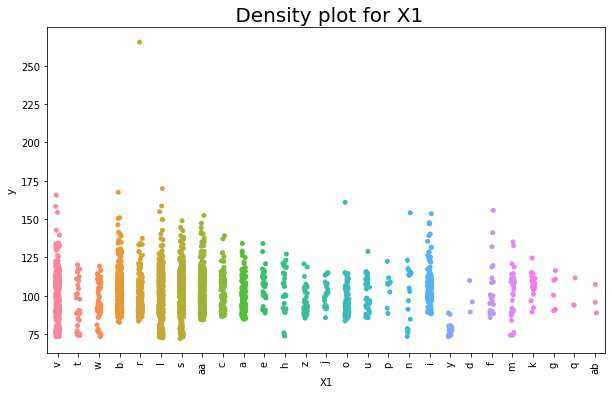

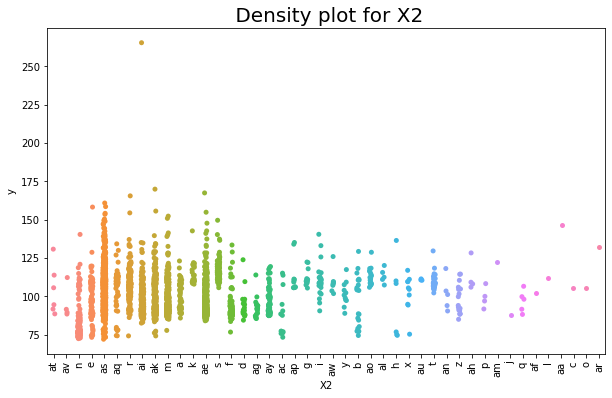

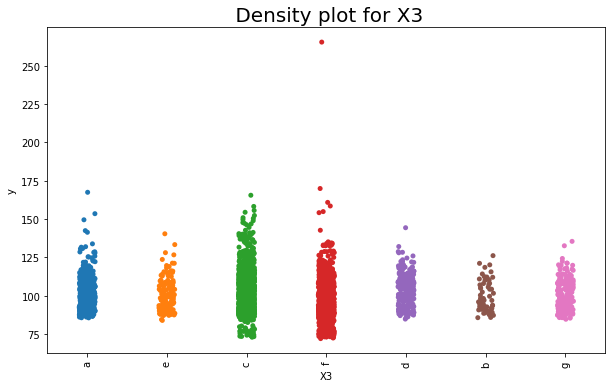

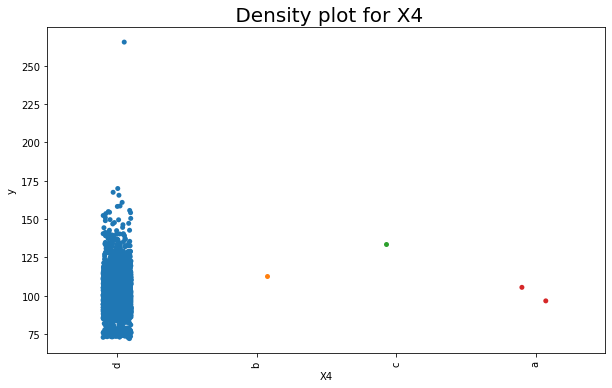

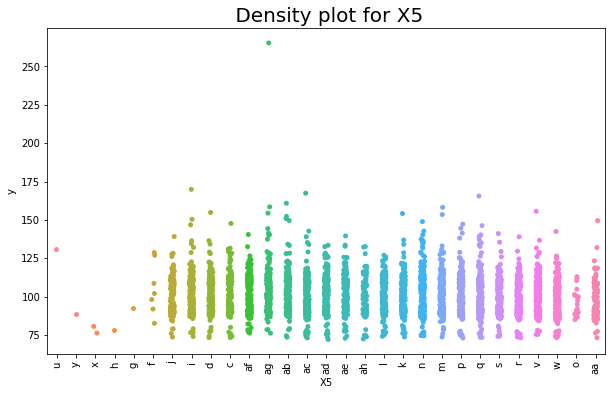

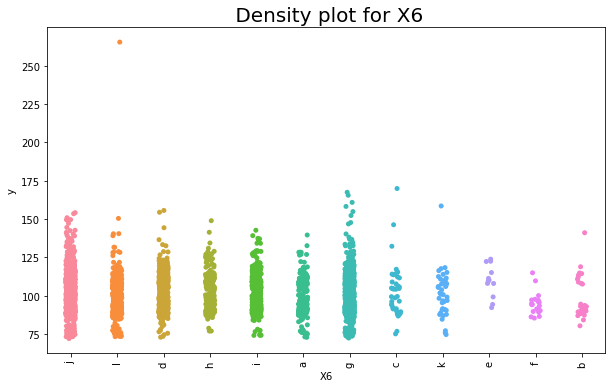

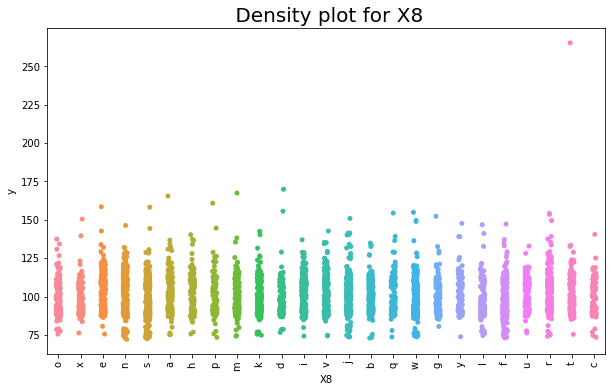

In [37]:
for col in data_copy.select_dtypes(include= object).columns: 
    sns.stripplot(x = data_copy[col], y = data_copy['y'])
    plt.title(' Density plot for {}'.format(col), fontdict= {'size' :20})
    plt.xticks(rotation = 90)
    plt.show()

# Modeling

### Base_model

In [38]:
Ols_model = sm.OLS(y_train, X_train).fit()
Ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     17.78
Date:                Sat, 22 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:43:31   Log-Likelihood:                -9697.8
No. Observations:                2820   AIC:                         1.989e+04
Df Residuals:                    2572   BIC:                         2.137e+04
Df Model:                         247                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             0.0629      0.018      3.517      0.000       0.028       0.098
X1            -0.0341      0.044     -0.778      0.437      -0.120       0.052
X2             0.0278      0.061      0.451      0.652      -0.093       0.148
X3            -0.2657      0.146     -1.817      0.069      -0.552       0.021
X4            -0.8252      2.169     -0.380      0.704      -5.079       3.429
X5            -0.0702      0.020     -3.482      0.001      -0.110      -0.031
X6             0.0223      0.059      0.379      0.704      -0.093       0.138
X8            -0.0083      0.023     -0.352      0.725      -0.054       0.038
X10            4.5084      5.282      0.854      0.393      -5.849      14.866
X12            1.0367      3.672      0.282      0.778      -6.163       8.237
X13           -0.2843      1.979     -0.144      0.886      -4.166       3.597
X14           -0.2877      3.830     -0.075      0.940      -7.798       7.222
X15           11.4629      7.939      1.444      0.149      -4.104      27.030
X16            2.4046      5.563      0.432      0.666      -8.503      13.312
X17            0.1516      2.226      0.068      0.946      -4.213       4.516
X18           10.1053      6.513      1.551      0.121      -2.667      22.877
X19            2.4577      6.433      0.382      0.702     -10.157      15.072
X20           -0.0716      3.755     -0.019      0.985      -7.434       7.291
X21           -3.4487      5.007     -0.689      0.491     -13.267       6.369
X22           -0.7536      3.855     -0.195      0.845      -8.313       6.806
X23            0.3706      4.057      0.091      0.927      -7.584       8.325
X24           -3.3535      4.906     -0.684      0.494     -12.974       6.267
X26            2.0774      5.792      0.359      0.720      -9.279      13.434
X27           -0.2095      0.662     -0.316      0.752      -1.508       1.089
X28            2.9645      6.290      0.471      0.637      -9.370      15.299
X29            2.4743      1.287      1.922      0.055      -0.050       4.999
X30          -21.1572     16.782     -1.261      0.208     -54.064      11.750
X31           -0.0866      0.223     -0.388      0.698      -0.525       0.352
X32            6.9988     17.019      0.411      0.681     -26.374      40.372
X33           -4.6491      4.361     -1.066      0.287     -13.201       3.903
X34            8.1983     10.046      0.816      0.415     -11.500      27.897
X35           -0.0866      0.223     -0.388      0.698      -0.525       0.352
X36           -0.9664      4.941     -0.196      0.845     -10.655       8.722
X37           -0.0866      0.223     -0.388      0.698      -0.525       0.352
X38           -0.6348      0.985     -0.644      0.519      -2.566       1.297
X39           -4.6491      4.361     -1.066      0.287     -13.201       3.903
X4

From above it is clear that model contains lots of insignificant variable as the p vale for many attributes are greater than
0.05 (consider 0.05 level of significance for business  )

The durbin watson value is almost 2 which means that autocorrelation does not exits in the data


F sat probability is almost zero which less than .05 , so reject null hypothesis  for the annova test of model  , meaning model is significant

The gap between R squared value and adjusted r squared value is very high it means that insignificant variables whose contributions in the model is almost negligible exits there, these problem will be addressed in feature selection methond further.

In [39]:
y_pred = Ols_model.predict(X_test)
print('result on the test data')
print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)  # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

result on the test data
root mean square error 9.84936997516846
mean absolute percentage error 5.548204509938233
r2 score or explained variance 0.4437022452302368


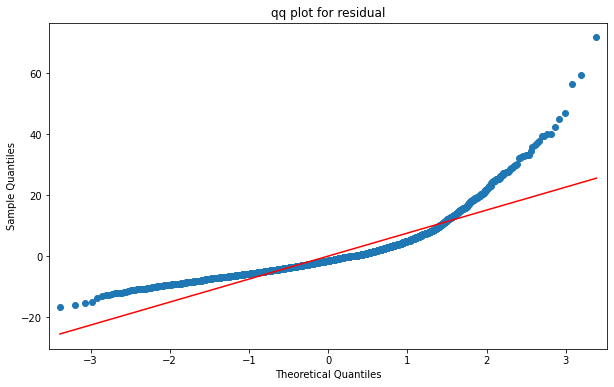

In [41]:
qqplot(Ols_model.resid, line ='s')
plt.title('qq plot for residual')
plt.show();

The qq plot of residual shows that the residuals somewhere allies to line somewhere not, for good model the resiudals should be
normal, here in this case the model fine but not so well. Let's explore other model 

### Decision Tree

In [51]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print('result on the test data')

y_pred = model.predict(X_test)  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('result on the train data')

y_pred_train = model.predict(X_train) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 12.923280284863218
mean absolute percentage error 7.509480852531706
r2 score or explained variance 0.04228578917848447
result on the train data
root mean square error 1.4986272704133201
mean absolute percentage error 0.30090456405740945
r2 score or explained variance 0.9854048208528926


The performance of above algorithm is not so well compare to base model

base_model :   
rmse: 9.8493    mape:  5.54820    r2 score: 0.4437022452302368

Decision Tree:
rmse:  12.9232         mape:  7.50948           r2 score:  0.98540482


From previous cell it is clear that  decision tree model is working well on the train set but poor on test set as the r2 score on train set is 0.98 and 0.042 on test set

In [52]:
model = RandomForestRegressor() # random forest model to address overfitting of decision tree 
model.fit(X_train, y_train)
print('result on the test data')

y_pred = model.predict(X_test)  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('result on the train data')

y_pred_train = model.predict(X_train) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 10.283230324373926
mean absolute percentage error 5.953502068716349
r2 score or explained variance 0.3936134901914936
result on the train data
root mean square error 3.3512769752911966
mean absolute percentage error 2.124508726069952
r2 score or explained variance 0.9270134537355919


The Random forest model is addressing the problem of overfitting and doing well compare to decision tree. However performance it not up to the level of base model. Let's explore the new model. 

### K nearest neigbhbours regressors

In [53]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
print('result on the test data')

y_pred = model.predict(X_test)  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('result on the train data')

y_pred_train = model.predict(X_train) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 11.01421497921442
mean absolute percentage error 6.894887106832788
r2 score or explained variance 0.30433924720511885
result on the train data


C:\Users\rishw\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\rishw\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


root mean square error 8.05704941188348
mean absolute percentage error 5.457282640557897
r2 score or explained variance 0.5781342945614656


base_model :
rmse: 9.8493 mape: 5.54820 r2 score: 0.4437022452302368

knn model : 11.01421 rmse: 6.89488 mape: 7.50948 r2 score: 0.304339

Knn model performance is not match with base model so not improving further

### Adaboostregressor

In [54]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
print('result on the test data')

y_pred = model.predict(X_test)  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('result on the train data')

y_pred_train = model.predict(X_train) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 10.60730295445727
mean absolute percentage error 7.68551307325788
r2 score or explained variance 0.35479109870195125
result on the train data
root mean square error 8.965932711941146
mean absolute percentage error 7.41667807691854
r2 score or explained variance 0.47758803139528805


base_model :   
rmse: 9.8493    mape:  5.54820    r2 score: 0.4437022452302368

Ada boost model:
rmse: 10.6073     mape:  7.68551         r2 score:   0.35479

The ada boost model is not upto that level as it is lagging in r2 score , mean absolute percentage error and root mean square error

### Xgboost

In [55]:
model = XGBRegressor()
model.fit(X_train, y_train)
print('result on the test data')

y_pred = model.predict(X_test)  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('result on the train data')

y_pred_train = model.predict(X_train) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 10.422038377450074
mean absolute percentage error 6.024645123867767
r2 score or explained variance 0.37713239991503567
result on the train data
root mean square error 3.8792312646162563
mean absolute percentage error 2.5522015926210853
r2 score or explained variance 0.9022057072148415


Interpretaion:

From above algorithms it is observed that all works good on training data but not on the test data , it is becuase data contains huge number of features, the dimensions are high in number which is cuasing algorithms to work well while training and bad during testing. This is leading to overfitting.


The problem can be addressed:

1.Adding more records into the data, but this is not feasible option as the model need to build on the given data only.


2. We can reduce the dimensions of the data to address the problem.



## Using feature selection to address the problem

Apllying lasso algorithm to reduce the dimension size

In [56]:
model = Lasso()  # 
model.fit(X_train, y_train)
print('result on the test data')

y_pred = model.predict(X_test)  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('\n')
print('result on the train data')

y_pred_train = model.predict(X_train) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 10.700265608443878
mean absolute percentage error 6.538187430406239
r2 score or explained variance 0.3434322892811993


result on the train data
root mean square error 9.441798875558462
mean absolute percentage error 6.583561267371987
r2 score or explained variance 0.42066247734593065


In [57]:
pd.set_option('display.max_rows',None) # to display all rows 

In [58]:
df_lasso_coef = pd.DataFrame(model.coef_, index = X.columns, columns= ['coef'])  # creating data fram of coef
df_lasso_coef = df_lasso_coef.sort_values(by = ['coef'], ascending= False) # sorting the coef of lasso algo
df_lasso_coef

,coef
X314,10.833145
X118,3.115462
X2,0.003163
X8,0.002922
X255,0.000000
X263,0.000000
X262,0.000000
X261,0.000000
X260,0.000000
X259,-0.000000


In [165]:
np.array(df_lasso_coef.head(100).index) # selecting 100 dimensions out of 364 with high value of coef

array(['X314', 'X118', 'X2', 'X8', 'X255', 'X263', 'X262', 'X261', 'X260',
       'X259', 'X258', 'X257', 'X256', 'X192', 'X254', 'X264', 'X252',
       'X251', 'X250', 'X249', 'X248', 'X247', 'X246', 'X245', 'X253',
       'X266', 'X265', 'X277', 'X285', 'X284', 'X283', 'X282', 'X281',
       'X280', 'X279', 'X278', 'X276', 'X243', 'X275', 'X274', 'X273',
       'X272', 'X271', 'X270', 'X269', 'X267', 'X244', 'X241', 'X242',
       'X217', 'X215', 'X214', 'X213', 'X212', 'X211', 'X210', 'X209',
       'X208', 'X207', 'X206', 'X205', 'X204', 'X203', 'X202', 'X201',
       'X200', 'X199', 'X198', 'X197', 'X216', 'X218', 'X287', 'X219',
       'X240', 'X239', 'X238', 'X237', 'X236', 'X234', 'X232', 'X231',
       'X230', 'X229', 'X228', 'X227', 'X226', 'X225', 'X224', 'X223',
       'X222', 'X221', 'X220', 'X286', 'X291', 'X288', 'X340', 'X361',
       'X360', 'X359', 'X358'], dtype=object)

In [84]:
selected_columns = list(df_lasso_coef.head(120).index)

In [85]:
model = Lasso() # applying lasso on selected columns
model.fit(X_train[selected_columns], y_train)
print('result on the test data')

y_pred = model.predict(X_test[selected_columns])  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('\n')
print('result on the train data')

y_pred_train = model.predict(X_train[selected_columns]) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 10.689480066721968
mean absolute percentage error 6.4831645704536385
r2 score or explained variance 0.34475522270343817


result on the train data
root mean square error 9.48772225052435
mean absolute percentage error 6.566813738378424
r2 score or explained variance 0.4150131649298533


The performance is not so well after reducing the the size let's try other technique

In [81]:
selected_columns # displaying selected featue of lasso algorithms 

['X314',
 'X118',
 'X2',
 'X8',
 'X255',
 'X263',
 'X262',
 'X261',
 'X260',
 'X259',
 'X258',
 'X257',
 'X256',
 'X192',
 'X254',
 'X264',
 'X252',
 'X251',
 'X250',
 'X249',
 'X248',
 'X247',
 'X246',
 'X245',
 'X253',
 'X266',
 'X265',
 'X277',
 'X285',
 'X284',
 'X283',
 'X282',
 'X281',
 'X280',
 'X279',
 'X278',
 'X276',
 'X243',
 'X275',
 'X274',
 'X273',
 'X272',
 'X271',
 'X270',
 'X269',
 'X267',
 'X244',
 'X241',
 'X242',
 'X217',
 'X215',
 'X214',
 'X213',
 'X212',
 'X211',
 'X210',
 'X209',
 'X208',
 'X207',
 'X206',
 'X205',
 'X204',
 'X203',
 'X202',
 'X201',
 'X200',
 'X199',
 'X198',
 'X197',
 'X216',
 'X218',
 'X287',
 'X219',
 'X240',
 'X239',
 'X238',
 'X237',
 'X236',
 'X234',
 'X232',
 'X231',
 'X230',
 'X229',
 'X228',
 'X227',
 'X226',
 'X225',
 'X224',
 'X223',
 'X222',
 'X221',
 'X220',
 'X286',
 'X291',
 'X288',
 'X340',
 'X361',
 'X360',
 'X359',
 'X358']

### Gradient boost

Applying gradient boost using features selected via lasso algorithm

In [86]:
model = GradientBoostingRegressor()
model.fit(X_train[selected_columns], y_train)
print('result on the test data')

y_pred = model.predict(X_test[selected_columns])  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('\n')
print('result on the train data')

y_pred_train = model.predict(X_train[selected_columns]) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 9.883383475785472
mean absolute percentage error 5.522657701198889
r2 score or explained variance 0.43985340905958237


result on the train data
root mean square error 7.698208642280842
mean absolute percentage error 5.0321747927507054
r2 score or explained variance 0.6148751672784355


base_model :   
rmse: 9.8493    mape:  5.54820    r2 score: 0.4437022452302368

gradient boost model:

rmse: 9.883383     mape:  5.52265        r2 score:    0.4398

The gradient boost performance is comparable to base model but it is over fit littbe bit as r2 score is high on train but less on the test set

### Ridge

In [62]:
model = Ridge()
model.fit(X_train, y_train)
print('result on the test data')

y_pred = model.predict(X_test)  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('\n')
print('result on the train data')

y_pred_train = model.predict(X_train) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 9.68232710387318
mean absolute percentage error 5.437341422901008
r2 score or explained variance 0.46241157935845567


result on the train data
root mean square error 7.562211288973683
mean absolute percentage error 4.87825441342848
r2 score or explained variance 0.6283622837750785


base_model :
rmse: 9.8493 mape: 5.54820 r2 score: 0.4437022452302368

Ridge regression model:

rmse: 9.68232 mape:  5.43734 r2 score: 0.462411

The ridge regression is firt algorithm that outperforms the base model, the r2 score is approximately 3% higher , it can further be improved littbe fit after tuning 

### Elastic net

In [63]:
model = ElasticNet()
model.fit(X_train, y_train)
print('result on the test data')

y_pred = model.predict(X_test)  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('\n')
print('result on the train data')

y_pred_train = model.predict(X_train) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 10.953879989659244
mean absolute percentage error 7.039477164984796
r2 score or explained variance 0.31193992012235894


result on the train data
root mean square error 9.69494873634314
mean absolute percentage error 7.039406525388774
r2 score or explained variance 0.3891800659483827


base_model :
rmse: 9.8493 mape: 5.54820 r2 score: 0.4437022452302368

Elastic regression model:

rmse: 10.953879 mape:  7.03947 r2 score: 0.31193

The Elastic regression r2 score is very poor compare to base_model , it is better to go ridge regression instead of elastic net

### Using Forward selection technique

In [68]:
estimator = LinearRegression()
sfs = SFS(estimator = estimator, k_features= 'best', n_jobs= -2, cv =3, verbose=1) # forward feature selection
sfs.fit(X_train, y_train)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-2)]: Done 290 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-2)]: Done 364 out of 364 | elapsed:    2.2s finished
Features: 1/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 363 out of 363 | elapsed:    0.1s finished
Features: 2/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 362 out of 362 | elapsed:    0.1s finished
Features: 3/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 332 out of 361 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 361 out of 361 

[Parallel(n_jobs=-2)]: Done 298 out of 298 | elapsed:    1.6s finished
Features: 67/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 297 out of 297 | elapsed:    1.6s finished
Features: 68/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 267 out of 296 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-2)]: Done 296 out of 296 | elapsed:    1.6s finished
Features: 69/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 266 out of 295 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-2)]: Done 295 out of 295 | elapsed:    1.5s finished
Features: 70/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent worke

Features: 98/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 237 out of 266 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-2)]: Done 266 out of 266 | elapsed:    1.9s finished
Features: 99/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 236 out of 265 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-2)]: Done 265 out of 265 | elapsed:    1.9s finished
Features: 100/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 264 out of 264 | elapsed:    1.9s finished
Features: 101/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.1s
[Pa

[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 207 out of 236 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-2)]: Done 236 out of 236 | elapsed:    2.2s finished
Features: 129/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 235 out of 235 | elapsed:    2.2s finished
Features: 130/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 205 out of 234 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-2)]: Done 234 out of 234 | elapsed:    2.2s finished
Features: 131/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 233 out of 233 | elapsed:    2.2s finished
Features: 132/364[Parall

[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 176 out of 205 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-2)]: Done 205 out of 205 | elapsed:    2.3s finished
Features: 160/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 175 out of 204 | elapsed:    2.1s remaining:    0.3s
[Parallel(n_jobs=-2)]: Done 204 out of 204 | elapsed:    2.4s finished
Features: 161/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 174 out of 203 | elapsed:    2.1s remaining:    0.3s
[Parallel(n_jobs=-2)]: Done 203 out of 203 | elapsed:    2.4s finished
Features: 162/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jo

[Parallel(n_jobs=-2)]: Done 175 out of 175 | elapsed:    2.4s finished
Features: 190/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 145 out of 174 | elapsed:    2.0s remaining:    0.3s
[Parallel(n_jobs=-2)]: Done 174 out of 174 | elapsed:    2.4s finished
Features: 191/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 144 out of 173 | elapsed:    2.0s remaining:    0.3s
[Parallel(n_jobs=-2)]: Done 173 out of 173 | elapsed:    2.4s finished
Features: 192/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 172 out of 172 | elapsed:    2.5s finished
Features: 193/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent w

Features: 250/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done  85 out of 114 | elapsed:    1.7s remaining:    0.5s
[Parallel(n_jobs=-2)]: Done 114 out of 114 | elapsed:    2.2s finished
Features: 251/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 113 out of 113 | elapsed:    2.2s finished
Features: 252/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done  83 out of 112 | elapsed:    1.7s remaining:    0.5s
[Parallel(n_jobs=-2)]: Done 112 out of 112 | elapsed:    2.2s finished
Features: 253/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.5s
[

[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done  84 out of  84 | elapsed:    1.8s finished
Features: 281/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done  83 out of  83 | elapsed:    1.9s finished
Features: 282/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done  53 out of  82 | elapsed:    1.3s remaining:    0.7s
[Parallel(n_jobs=-2)]: Done  82 out of  82 | elapsed:    1.8s finished
Features: 283/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done  52 out of  81 | elapsed:    1.3s remaining:    0.7s
[Parallel(n_jobs=-2)]: Done  81 out of  81 | elapsed:    1.8s finished
Features: 284/364[Parall

[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done  51 out of  51 | elapsed:    1.3s finished
Features: 314/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    1.3s finished
Features: 315/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done  49 out of  49 | elapsed:    1.3s finished
Features: 316/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  48 out of  48 | elapsed:    1.3s finished
Features: 317/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  47 out of  47 | elapsed:    1.2s finished
Features: 318/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurren

Features: 355/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   9 out of   9 | elapsed:    0.3s finished
Features: 356/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   6 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   8 out of   8 | elapsed:    0.3s finished
Features: 357/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   7 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-2)]: Done   7 out of   7 | elapsed:    0.2s finished
Features: 358/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   6 out of   6 | elapsed:    0.2s finished
Features: 359/364[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.2s finished
Features: 360

SequentialFeatureSelector(cv=3, estimator=LinearRegression(), k_features='best',
                          n_jobs=-2, verbose=1)

In [69]:
selected_columns_sfs = list(sfs.k_feature_names_)
selected_columns_sfs # diplaying best features 

['X0',
 'X1',
 'X2',
 'X3',
 'X5',
 'X12',
 'X18',
 'X21',
 'X29',
 'X33',
 'X36',
 'X38',
 'X39',
 'X42',
 'X47',
 'X52',
 'X54',
 'X59',
 'X60',
 'X64',
 'X71',
 'X74',
 'X75',
 'X76',
 'X79',
 'X83',
 'X92',
 'X110',
 'X116',
 'X118',
 'X119',
 'X120',
 'X124',
 'X125',
 'X136',
 'X137',
 'X142',
 'X143',
 'X145',
 'X148',
 'X151',
 'X152',
 'X153',
 'X156',
 'X157',
 'X158',
 'X160',
 'X165',
 'X173',
 'X178',
 'X185',
 'X190',
 'X203',
 'X204',
 'X205',
 'X206',
 'X207',
 'X218',
 'X221',
 'X226',
 'X227',
 'X230',
 'X232',
 'X236',
 'X240',
 'X244',
 'X248',
 'X253',
 'X254',
 'X257',
 'X259',
 'X260',
 'X263',
 'X269',
 'X270',
 'X272',
 'X275',
 'X278',
 'X279',
 'X284',
 'X288',
 'X292',
 'X294',
 'X295',
 'X296',
 'X300',
 'X301',
 'X307',
 'X308',
 'X311',
 'X313',
 'X314',
 'X315',
 'X316',
 'X318',
 'X319',
 'X326',
 'X327',
 'X328',
 'X329',
 'X332',
 'X335',
 'X339',
 'X340',
 'X345',
 'X359',
 'X362',
 'X363',
 'X364',
 'X365',
 'X369',
 'X380',
 'X385']

In [12]:
selected_columns_sfs = ['X0',
 'X1',
 'X2',
 'X3',
 'X5',
 'X12',
 'X18',
 'X21',
 'X29',
 'X33',
 'X36',
 'X38',
 'X39',
 'X42',
 'X47',
 'X52',
 'X54',
 'X59',
 'X60',
 'X64',
 'X74',
 'X75',
 'X76',
 'X79',
 'X83',
 'X84',
 'X92',
 'X110',
 'X116',
 'X118',
 'X119',
 'X120',
 'X124',
 'X125',
 'X136',
 'X137',
 'X142',
 'X143',
 'X145',
 'X148',
 'X151',
 'X152',
 'X153',
 'X155',
 'X156',
 'X157',
 'X158',
 'X160',
 'X173',
 'X178',
 'X185',
 'X190',
 'X203',
 'X204',
 'X205',
 'X206',
 'X207',
 'X218',
 'X221',
 'X226',
 'X227',
 'X230',
 'X232',
 'X236',
 'X240',
 'X248',
 'X253',
 'X254',
 'X257',
 'X259',
 'X260',
 'X263',
 'X269',
 'X270',
 'X272',
 'X275',
 'X278',
 'X279',
 'X284',
 'X288',
 'X292',
 'X294',
 'X295',
 'X296',
 'X300',
 'X301',
 'X307',
 'X308',
 'X311',
 'X313',
 'X314',
 'X315',
 'X316',
 'X318',
 'X319',
 'X326',
 'X327',
 'X328',
 'X329',
 'X332',
 'X335',
 'X339',
 'X340',
 'X345',
 'X359',
 'X362',
 'X363',
 'X364',
 'X365',
 'X369',
 'X380',
 'X385'] # list of best features selected from sequential feature selecture (keeping forward true)

In [70]:
X_train.shape

(2820, 364)

In [71]:
len(sfs.k_feature_names_) # number of feature seletcted has been reduced from 364 to 113

113

In [72]:
model = Ridge(alpha = 300)
model.fit(X_train[selected_columns_sfs], y_train)
print('result on the test data')

y_pred = model.predict(X_test[selected_columns_sfs])  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('\n')
print('result on the train data')

y_pred_train = model.predict(X_train[selected_columns_sfs]) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 9.950249287261329
mean absolute percentage error 5.726004156858202
r2 score or explained variance 0.4322484515541446


result on the train data
root mean square error 8.364697726324078
mean absolute percentage error 5.622365715375697
r2 score or explained variance 0.5453023906296905


base_model :
rmse: 9.8493 mape: 5.54820 r2 score: 0.4437022452302368

Ridge regression full  model:

rmse: 9.68232 mape:  5.43734 r2 score: 0.462411

            
Ridge regression on selected feature from forward selection:

rmse:  9.950  mape: 5.726 r2score:  0.4322

Ridge regresion is not doing well with selected feature however it outperforms with selected feature

In [109]:
# dealing with underfitting and overfitting

['X314', 'X118', 'X2', 'X8', 'X255', 'X263', 'X262', 'X261', 'X260']

### Tuning Ridge model (coarse)

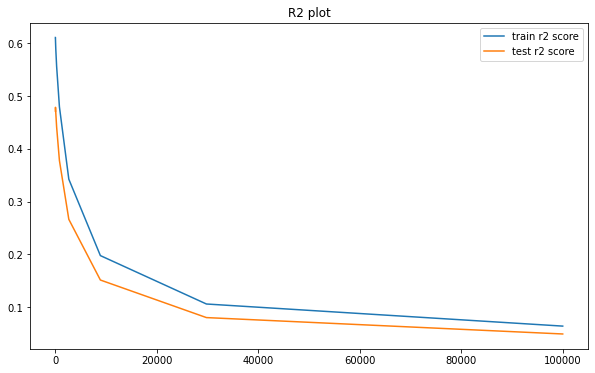

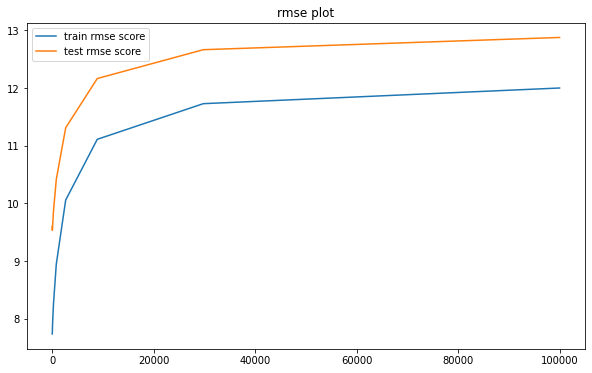

In [73]:
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []
alpha_array = np.logspace(-5,5, 20)
for alpha in alpha_array:
    model = Ridge(alpha = alpha, max_iter= 300)
    model.fit(X_train[selected_columns_sfs], y_train)
    r2_train.append(r2_score(y_train, model.predict(X_train[selected_columns_sfs])))
    r2_test.append(r2_score(y_test, model.predict(X_test[selected_columns_sfs])))
    
    rmse_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train[selected_columns_sfs]))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test[selected_columns_sfs]))))

print()

plt.plot(alpha_array,r2_train,label = 'train r2 score')
plt.plot(alpha_array,r2_test, label = 'test r2 score')
plt.title("R2 plot")
plt.legend()
plt.show()
                     
                     
plt.plot(alpha_array, rmse_train,label = 'train rmse score')
plt.plot(alpha_array, rmse_test, label = 'test rmse score')
plt.title('rmse plot')
plt.legend()
plt.show()
                              
                    

From above it clear that low value of alpha converge both train and test r2 score and rmse score

### Fine tuning of Ridge model

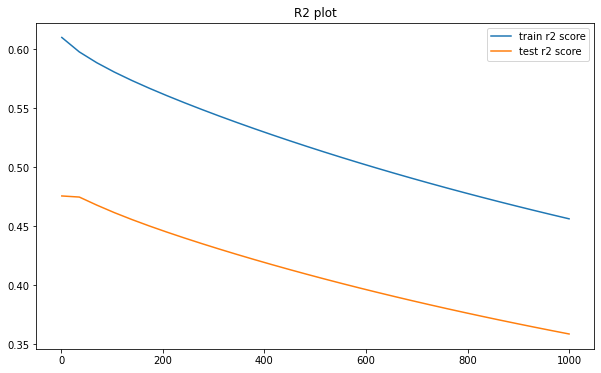

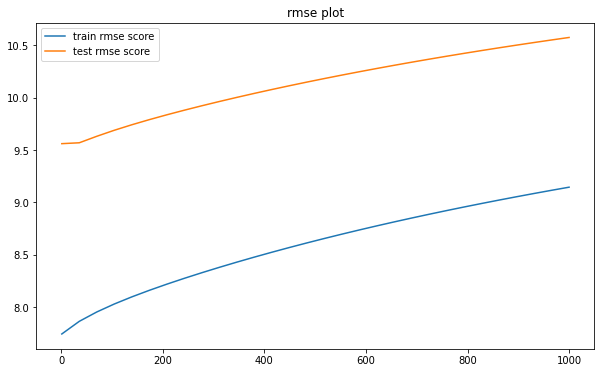

In [74]:
r2_train = [] 
r2_test = []
rmse_train = []
rmse_test = []
alpha_array = np.linspace(1, 1000, 30)
for alpha in alpha_array:
    model = Ridge(alpha = alpha, max_iter= 300)
    model.fit(X_train[selected_columns_sfs], y_train)
    r2_train.append(r2_score(y_train, model.predict(X_train[selected_columns_sfs])))
    r2_test.append(r2_score(y_test, model.predict(X_test[selected_columns_sfs])))
    
    rmse_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train[selected_columns_sfs]))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test[selected_columns_sfs]))))

print()

plt.plot(alpha_array,r2_train,label = 'train r2 score')
plt.plot(alpha_array,r2_test, label = 'test r2 score')
plt.title("R2 plot")
plt.legend()
plt.show()
                     
                     
plt.plot(alpha_array, rmse_train,label = 'train rmse score')
plt.plot(alpha_array, rmse_test, label = 'test rmse score')
plt.title('rmse plot')
plt.legend()
plt.show()
                              
                    

From above plot it is clear that the gap between test and train is not reducing much with different value of alphas 

In [75]:
model = Ridge(alpha = 90) # best model 
model.fit(X_train[selected_columns_sfs], y_train)
print('result on the test data')

y_pred = model.predict(X_test[selected_columns_sfs])  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('\n')
print('result on the train data')

y_pred_train = model.predict(X_train[selected_columns_sfs]) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 9.665692102150976
mean absolute percentage error 5.370076504299828
r2 score or explained variance 0.46425723113264683


result on the train data
root mean square error 8.000926755103023
mean absolute percentage error 5.211314047901855
r2 score or explained variance 0.5839909705574684


### Tuning Gradeint boost model 

In [210]:
model = GradientBoostingRegressor() # Gradient boost with selected feature
model.fit(X_train[selected_columns_sfs], y_train)
print('result on the test data')

y_pred = model.predict(X_test[selected_columns_sfs])  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('\n')
print('result on the train data')

y_pred_train = model.predict(X_train[selected_columns_sfs]) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 9.390638370462888
mean absolute percentage error 5.126312007310042
r2 score or explained variance 0.49431434119762296


result on the train data
root mean square error 7.276128000147956
mean absolute percentage error 4.612966574360623
r2 score or explained variance 0.6559489966587877


In [216]:
# tuning gradient descent , coarse tuning 
model = GradientBoostingRegressor()

param = {'learning_rate': np.logspace(-4,4, 30),
        'n_estimators': [100, 200, 300],
        'min_samples_split':[2,3,4,5,6],
        'max_depth': [2,3,4,5,6,7,8]}

gd = GridSearchCV(estimator = model, param_grid= param, n_jobs= -2, cv= 3, verbose =1) # default scoring is r2
gd.fit(X_train[selected_columns_sfs], y_train)

Fitting 3 folds for each of 3150 candidates, totalling 9450 fits


C:\Users\rishw\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.01014556 0.02035633 0.03036427 ...        nan        nan        nan]
  warnings.warn(
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:978: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:978: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-2,
             param_grid={'learning_rate': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-2,
             param_grid={'learning_rate': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [217]:
gd.best_params_

{'learning_rate': 0.01610262027560939,
 'max_depth': 3,
 'min_samples_split': 3,
 'n_estimators': 300}

{'learning_rate': 0.01610262027560939,
 'max_depth': 3,
 'min_samples_split': 3,
 'n_estimators': 300}

In [218]:
model = GradientBoostingRegressor(learning_rate = 0.01610262027560939,
 max_depth = 3,
 min_samples_split = 3,
 n_estimators = 300) # best model 
model.fit(X_train[selected_columns_sfs], y_train)
print('result on the test data')

y_pred = model.predict(X_test[selected_columns_sfs])  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('\n')
print('result on the train data')

y_pred_train = model.predict(X_train[selected_columns_sfs]) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 9.37874440859921
mean absolute percentage error 5.087815302033994
r2 score or explained variance 0.4955945091104764


result on the train data
root mean square error 7.492822267879481
mean absolute percentage error 4.76466197827255
r2 score or explained variance 0.6351511094411499


In [224]:
# tuning gradient descent further with learning rate, fine tuning 
model_learning_rate = GradientBoostingRegressor(max_depth = 3,
 min_samples_split = 3,
 n_estimators = 300)

param = {'learning_rate': np.linspace(0, 0.1, 20)}

gd_learning = GridSearchCV(estimator = model_learning_rate, param_grid= param, n_jobs= -2, cv= 3, verbose =1) # default scoring is r2
gd_learning.fit(X_train[selected_columns_sfs], y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\rishw\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rishw\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rishw\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\rishw\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 274, in _check_params
    raise ValueError(
ValueError: learning_rate must be greater than 0 but was 0.0

  war

GridSearchCV(cv=3,
             estimator=GradientBoostingRegressor(min_samples_split=3,
                                                 n_estimators=300),
             n_jobs=-2,
             param_grid={'learning_rate': array([0.        , 0.00526316, 0.01052632, 0.01578947, 0.02105263,
       0.02631579, 0.03157895, 0.03684211, 0.04210526, 0.04736842,
       0.05263158, 0.05789474, 0.06315789, 0.06842105, 0.07368421,
       0.07894737, 0.08421053, 0.08947368, 0.09473684, 0.1       ])},
             verbose=1)

In [225]:
gd_learning.best_params_

{'learning_rate': 0.015789473684210527}

In [226]:
model = GradientBoostingRegressor(learning_rate = 0.015789473684210527,
 max_depth = 3,
 min_samples_split = 3,
 n_estimators = 300) # Final recommended model 
model.fit(X_train[selected_columns_sfs], y_train)
print('result on the test data')

y_pred = model.predict(X_test[selected_columns_sfs])  # prediction on test data

print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_test, y_pred)*100)# mean absolute percentage error
print('r2 score or explained variance',r2_score(y_test, y_pred))

print('\n')
print('result on the train data')

y_pred_train = model.predict(X_train[selected_columns_sfs]) # predition on train data
 
print('root mean square error', np.sqrt(mean_squared_error(y_train, y_pred_train))) # rmse
print('mean absolute percentage error',mean_absolute_percentage_error(y_train, y_pred_train)*100) # mean absolute percentage error
print('r2 score or explained variance',r2_score(y_train, y_pred_train))


result on the test data
root mean square error 9.378566572557407
mean absolute percentage error 5.087498828085098
r2 score or explained variance 0.4956136376039323


result on the train data
root mean square error 7.501400864409955
mean absolute percentage error 4.7701267037984625
r2 score or explained variance 0.634315193938416


Comparing ridge, gradient boost and base model

base_model :

rmse: 9.8493 mape: 5.54820 r2 score: 0.4437022452302368

Ridge regression model:

rmse: 9.68232 mape: 5.43734 r2 score: 0.462411

Gradient boost model:

rmse: 9.37856 mape: 5.08749 r2 score:  0.4956136


Above stats regarding rmse, mape, and r2score informs that gradient boosting after tuning is performing best, it increased the 
r2score approximately 5%(approx) compare to base model while ridge model performed better than base model with 2% (approx) rise compare to base moel.  

# Conclusion

Daimler’s engineers can use gradient boosting algorithms with features selected from forward selection technique to calculate the time required for testing of car. 

The best param for gradient boostings are:
learning_rate = 0.015789473684210527,
max_depth = 3,
min_samples_split = 3,
n_estimators = 300

The best 113 features out of 364 are mentioned below.
 'X0',
 'X1',
 'X2',
 'X3',
 'X5',
 'X12',
 'X18',
 'X21',
 'X29',
 'X33',
 'X36',
 'X38',
 'X39',
 'X42',
 'X47',
 'X52',
 'X54',
 'X59',
 'X60',
 'X64',
 'X74',
 'X75',
 'X76',
 'X79',
 'X83',
 'X84',
 'X92',
 'X110',
 'X116',
 'X118',
 'X119',
 'X120',
 'X124',
 'X125',
 'X136',
 'X137',
 'X142',
 'X143',
 'X145',
 'X148',
 'X151',
 'X152',
 'X153',
 'X155',
 'X156',
 'X157',
 'X158',
 'X160',
 'X173',
 'X178',
 'X185',
 'X190',
 'X203',
 'X204',
 'X205',
 'X206',
 'X207',
 'X218',
 'X221',
 'X226',
 'X227',
 'X230',
 'X232',
 'X236',
 'X240',
 'X248',
 'X253',
 'X254',
 'X257',
 'X259',
 'X260',
 'X263',
 'X269',
 'X270',
 'X272',
 'X275',
 'X278',
 'X279',
 'X284',
 'X288',
 'X292',
 'X294',
 'X295',
 'X296',
 'X300',
 'X301',
 'X307',
 'X308',
 'X311',
 'X313',
 'X314',
 'X315',
 'X316',
 'X318',
 'X319',
 'X326',
 'X327',
 'X328',
 'X329',
 'X332',
 'X335',
 'X339',
 'X340',
 'X345',
 'X359',
 'X362',
 'X363',
 'X364',
 'X365',
 'X369',
 'X380',
 'X385'
